## Mini Project III

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [26]:
customers = pd.read_csv('mini-project-csv/twm_customer.csv',
                        delimiter=';')

In [174]:
### Check how many rows and columns are in the customer dataset

In [27]:
customers.shape

(747, 15)

In [176]:
### Check the datatypes for each column 

In [28]:
customers.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [178]:
### Check for any null values for the columns

In [29]:
customers.isna().sum()

cust_id            0
income             0
age                0
years_with_bank    0
nbr_children       0
gender             0
marital_status     0
name_prefix        0
first_name         0
last_name          0
street_nbr         0
street_name        0
postal_code        0
city_name          0
state_code         0
dtype: int64

In [180]:
### Remove unneccessary columns 

In [30]:
## Check unique states 
customers['state_code'].value_counts()

CA      177
NY      107
TX       83
IL       56
AZ       24
OH       23
PA       21
TN       18
MO       17
FL       16
OK       16
OR       16
IN       16
WI       15
MN       13
HI       13
KY       13
NJ       12
CO       11
NC        9
MI        9
WA        9
MA        8
MD        8
NM        7
DC        6
VA        5
NV        4
AL        4
KS        3
LA        3
NB        3
GA        2
Name: state_code, dtype: int64

In [31]:
### check the distinct city names to decide whether to use in clustered data
customers['city_name'].value_counts()

New York City                               98
Los Angeles                                 84
Chicago                                     56
Houston                                     39
San Francisco                               23
                                            ..
Tampa                                        2
Colorado Springs                             2
Virginia Beach                               1
Arlington                                    1
Buffalo                                      1
Name: city_name, Length: 69, dtype: int64

In [32]:

states = {
        'AK': 'O',
        'AL': 'S',
        'AR': 'S',
        'AS': 'O',
        'AZ': 'W',
        'CA': 'W',
        'CO': 'W',
        'CT': 'N',
        'DC': 'N',
        'DE': 'N',
        'FL': 'S',
        'GA': 'S',
        'GU': 'O',
        'HI': 'O',
        'IA': 'M',
        'ID': 'W',
        'IL': 'M',
        'IN': 'M',
        'KS': 'M',
        'KY': 'S',
        'LA': 'S',
        'MA': 'N',
        'MD': 'N',
        'ME': 'N',
        'MI': 'W',
        'MN': 'M',
        'MO': 'M',
        'MP': 'O',
        'MS': 'S',
        'MT': 'W',
        'NA': 'O',
        'NC': 'S',
        'ND': 'M',
        'NE': 'W',
        'NH': 'N',
        'NJ': 'N',
        'NM': 'W',
        'NV': 'W',
        'NY': 'N',
        'OH': 'M',
        'OK': 'S',
        'OR': 'W',
        'PA': 'N',
        'PR': 'O',
        'RI': 'N',
        'SC': 'S',
        'SD': 'M',
        'TN': 'S',
        'TX': 'S',
        'UT': 'W',
        'VA': 'S',
        'VI': 'O',
        'VT': 'N',
        'WA': 'W',
        'WI': 'M',
        'WV': 'S',
        'WY': 'W'
}

region_mapping = {
    'O': 'Other',
    'S': 'South',
    'W': 'West',
    'N': 'North',
    'M': 'Midwest'
}

# Clean the 'state_code' values by converting to strings and removing leading/trailing whitespaces
customers['state_code'] = customers['state_code'].astype(str).str.strip()

# Create a new column 'Region' based on the mapping
customers['Region'] = customers['state_code'].map(states).map(region_mapping)


# Display the updated DataFrame
customers

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,Region
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,West
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,West
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,West
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,West
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,West
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,North
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,West
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,South


In [33]:
df_numeric = customers[['age', 'income','years_with_bank','nbr_children']]

In [34]:
df_numeric

,age,income,years_with_bank,nbr_children
0,46,26150,5,1
1,71,6605,1,0
2,38,18548,8,0
3,54,47668,3,0
4,59,44554,9,2
...,...,...,...,...
742,36,14795,6,1
743,56,26387,6,1
744,50,61300,0,2
745,37,15100,7,0


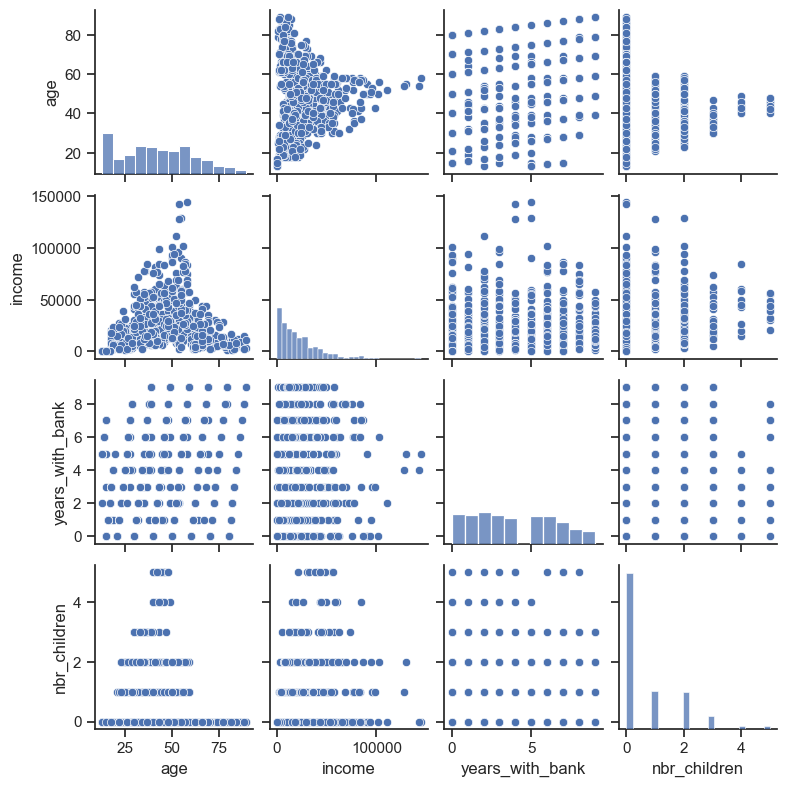

In [92]:
sns.set_theme(style="ticks")
sns.pairplot(df_numeric, height = 2, aspect = 1)

<Axes: xlabel='age', ylabel='Count'>

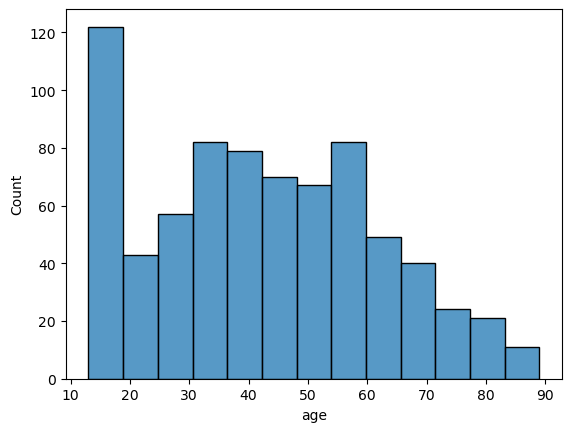

In [35]:
# Check to see if numeric data is normally distributed 
sns.histplot(data=df_numeric['age'])

<Axes: xlabel='income', ylabel='Count'>

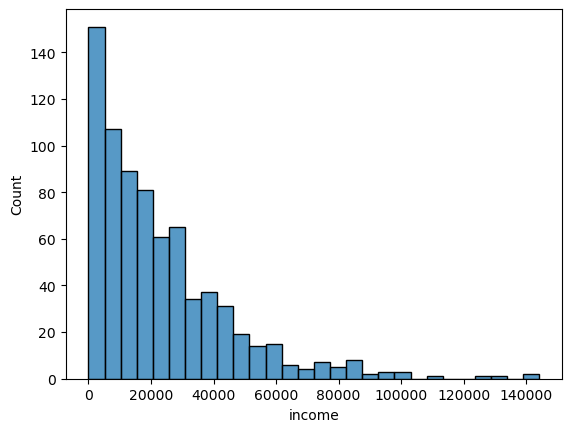

In [36]:
# Check to see if income is normally distributed
sns.histplot(data=df_numeric['income'])

In [37]:
# Scale our numeric data age and income
scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric))

In [38]:
# Min Max Scaler 
mmscaler = MinMaxScaler()
df_numeric_scaled_mm = pd.DataFrame(mmscaler.fit_transform(df_numeric))
# Add column names to our scaled dataframe
df_numeric_scaled_mm.columns = df_numeric.columns

In [39]:
# Add column names to our scaled dataframe
df_numeric_scaled.columns = df_numeric.columns

In [40]:
df_numeric_scaled_mm

,age,income,years_with_bank,nbr_children
0,0.434211,0.181399,0.555556,0.2
1,0.763158,0.045818,0.111111,0.0
2,0.328947,0.128665,0.888889,0.0
3,0.539474,0.330667,0.333333,0.0
4,0.605263,0.309066,1.000000,0.4
...,...,...,...,...
742,0.302632,0.102631,0.666667,0.2
743,0.565789,0.183043,0.666667,0.2
744,0.486842,0.425231,0.000000,0.4
745,0.315789,0.104747,0.777778,0.0


In [41]:
# Create dataframe for our categorical columns 
df_categorical = customers[['gender', 'marital_status', 'Region']]

In [42]:
df_categorical

,gender,marital_status,Region
0,M,2,West
1,M,2,West
2,F,1,West
3,F,1,West
4,F,4,North
...,...,...,...
742,F,4,West
743,M,2,North
744,M,2,West
745,F,2,South


In [43]:
df_dummy = pd.get_dummies(df_categorical)

In [44]:
df_dummy

,marital_status,gender_F,gender_M,Region_Midwest,Region_North,Region_Other,Region_South,Region_West
0,2,0,1,0,0,0,0,1
1,2,0,1,0,0,0,0,1
2,1,1,0,0,0,0,0,1
3,1,1,0,0,0,0,0,1
4,4,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
742,4,1,0,0,0,0,0,1
743,2,0,1,0,1,0,0,0
744,2,0,1,0,0,0,0,1
745,2,1,0,0,0,0,1,0


In [45]:
X = pd.concat([df_numeric_scaled, df_dummy], axis=1)

In [46]:
X

,age,income,years_with_bank,nbr_children,marital_status,gender_F,gender_M,Region_Midwest,Region_North,Region_Other,Region_South,Region_West
0,0.184312,0.154185,0.408539,0.258591,2,0,1,0,0,0,0,1
1,1.493070,-0.726524,-1.087435,-0.648298,2,0,1,0,0,0,0,1
2,-0.234490,-0.188366,1.530520,-0.648298,1,1,0,0,0,0,0,1
3,0.603115,1.123798,-0.339448,-0.648298,1,1,0,0,0,0,0,1
4,0.864867,0.983479,1.904514,1.165479,4,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
742,-0.339191,-0.357478,0.782533,0.258591,4,1,0,0,0,0,0,1
743,0.707816,0.164864,0.782533,0.258591,2,0,1,0,1,0,0,0
744,0.393714,1.738064,-1.461429,1.165479,2,0,1,0,0,0,0,1
745,-0.286841,-0.343735,1.156526,-0.648298,2,1,0,0,0,0,1,0


In [47]:
inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)


/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/pyt

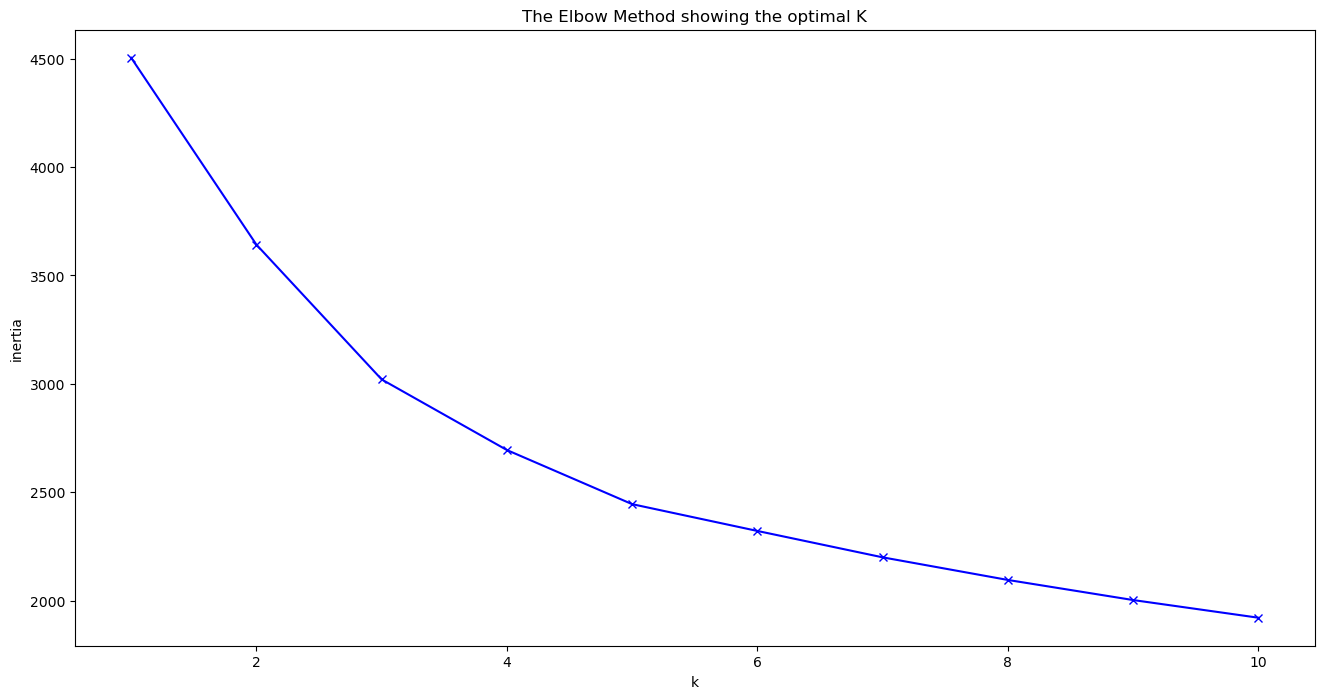

In [48]:
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

In [49]:
silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    label=kmeanModel.predict(X)
    silhouettes.append(silhouette_score(X,label))

/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ckz/anaconda3/lib/pyt

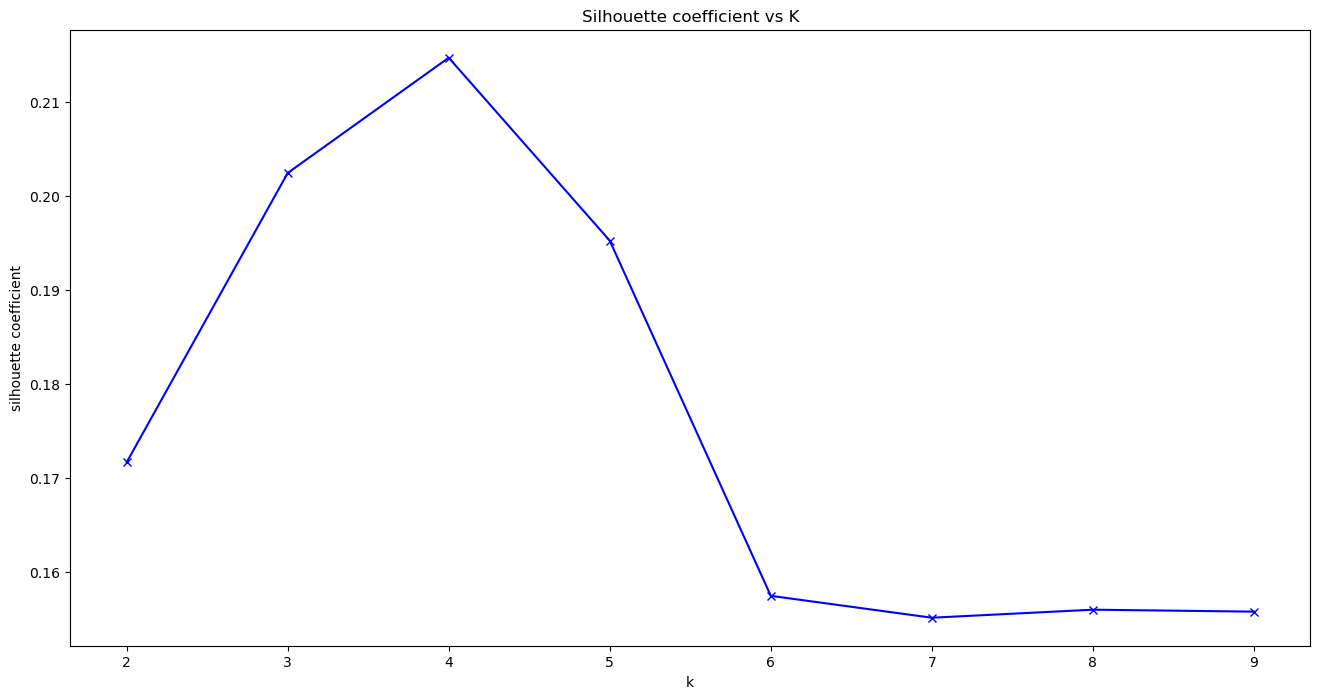

In [50]:
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [76]:
# run the model using three clusters
kmodel = KMeans(n_clusters=3,
                n_init=12)

In [77]:
# Identify clusters
y_km = kmodel.fit_predict(X)

In [78]:
# Check how many data points fall within each cluster
pd.Series(kmodel.labels_).value_counts()

2    254
0    253
1    240
dtype: int64

In [79]:
# Append clusters to customers training data
X['y_km'] = y_km

In [80]:
X

,age,income,years_with_bank,nbr_children,marital_status,gender_F,gender_M,Region_Midwest,Region_North,Region_Other,Region_South,Region_West,y_km
0,0.184312,0.154185,0.408539,0.258591,2,0,1,0,0,0,0,1,0
1,1.493070,-0.726524,-1.087435,-0.648298,2,0,1,0,0,0,0,1,0
2,-0.234490,-0.188366,1.530520,-0.648298,1,1,0,0,0,0,0,1,1
3,0.603115,1.123798,-0.339448,-0.648298,1,1,0,0,0,0,0,1,0
4,0.864867,0.983479,1.904514,1.165479,4,1,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-0.339191,-0.357478,0.782533,0.258591,4,1,0,0,0,0,0,1,2
743,0.707816,0.164864,0.782533,0.258591,2,0,1,0,1,0,0,0,0
744,0.393714,1.738064,-1.461429,1.165479,2,0,1,0,0,0,0,1,2
745,-0.286841,-0.343735,1.156526,-0.648298,2,1,0,0,0,0,1,0,0


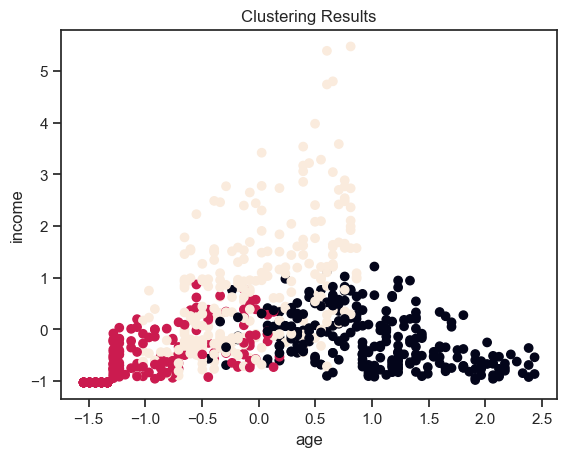

In [93]:
plt.scatter(X['age'], X['income'], c=X['y_km'])
plt.xlabel('age')
plt.ylabel('income')
plt.title('Clustering Results')
plt.show()

In [ ]:
plt.scatter(X['nbr_children'], X['income'], c=X['y_km'])
plt.xlabel('age')
plt.ylabel('income')
plt.title('Clustering Results')
plt.show()

In [107]:
X['y_km'].value_counts()

2    254
0    253
1    240
Name: y_km, dtype: int64

## PCA

In [81]:
pca = PCA(n_components=2).set_output(transform="pandas")
df_pca = pca.fit_transform(X) #enconded and scaled data (that was passed into clustering algo)
df_pca.head()

,pca0,pca1
0,-0.123197,0.672211
1,-0.973779,0.958957
2,-0.971887,0.233395
3,-0.638389,0.749334
4,2.421429,1.707333


In [94]:

# Get the component loadings
loadings = pd.DataFrame(pca.components_, columns=X.columns)

# Print the loadings for PC1 and PC2
print("Loadings for PC1:")
print(loadings.iloc[0])
print()
print("Loadings for PC2:")
print(loadings.iloc[1])

Loadings for PC1:
age                0.046061
income             0.489577
years_with_bank   -0.052484
nbr_children       0.615516
marital_status     0.418052
gender_F          -0.036092
gender_M           0.036092
Region_Midwest    -0.008563
Region_North      -0.012617
Region_Other      -0.005334
Region_South       0.011512
Region_West        0.014981
y_km               0.445631
Name: 0, dtype: float64

Loadings for PC2:
age                0.756906
income             0.234768
years_with_bank    0.412058
nbr_children      -0.131582
marital_status     0.253740
gender_F          -0.012441
gender_M           0.012441
Region_Midwest     0.023015
Region_North       0.002965
Region_Other       0.000260
Region_South       0.003494
Region_West       -0.031518
y_km              -0.344432
Name: 1, dtype: float64


In [82]:
df_pca_with_clusters = df_pca.copy()
df_pca_with_clusters['y_km'] = X['y_km']
df_pca_with_clusters.head()

,pca0,pca1,y_km
0,-0.123197,0.672211,0
1,-0.973779,0.958957,0
2,-0.971887,0.233395,1
3,-0.638389,0.749334,0
4,2.421429,1.707333,2


In [83]:
#to visualize centroids in PCA space, we also need to transform them.
pca_centroids = pca.transform(kmodel.cluster_centers_)
pca_centroids

/Users/ckz/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



,pca0,pca1
0,-0.758899,1.270254
1,-1.010607,-1.119856
2,1.858190,-0.321029


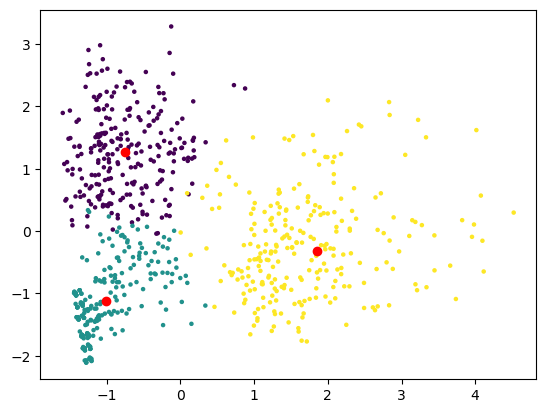

In [84]:
plt.scatter(df_pca_with_clusters['pca0'], df_pca_with_clusters['pca1'], c=df_pca_with_clusters['y_km'], s=5)
plt.scatter(pca_centroids['pca0'], pca_centroids['pca1'], c='red')

In [101]:
df_encoded = pd.concat([df_numeric, df_dummy], axis=1)

In [105]:
cluster_0_means = df_encoded[X['y_km']==0].mean()
cluster_1_means = df_encoded[X['y_km']==1].mean()
cluster_2_means = df_encoded[X['y_km']==2].mean()


means = pd.DataFrame([cluster_0_means, cluster_1_means, cluster_2_means])
means


,age,income,years_with_bank,nbr_children,marital_status,gender_F,gender_M,Region_Midwest,Region_North,Region_Other,Region_South,Region_West
0,62.000000,18357.845850,4.600791,0.193676,1.992095,0.600791,0.399209,0.237154,0.237154,0.027668,0.185771,0.304348
1,22.775000,8583.287500,3.379167,0.070833,1.158333,0.554167,0.445833,0.162500,0.208333,0.020833,0.229167,0.379167
2,41.653543,40446.858268,3.716535,1.842520,2.456693,0.523622,0.476378,0.173228,0.204724,0.003937,0.263780,0.350394


## Radar Chart


In [85]:
#Radar Chart
df_numeric_scaled_mm['y_km'] = y_km
df_numeric_scaled_mm.head()

,age,income,years_with_bank,nbr_children,y_km
0,0.434211,0.181399,0.555556,0.2,0
1,0.763158,0.045818,0.111111,0.0,0
2,0.328947,0.128665,0.888889,0.0,1
3,0.539474,0.330667,0.333333,0.0,0
4,0.605263,0.309066,1.000000,0.4,2


In [86]:
# Radar chart
categories = df_numeric_scaled_mm.columns.to_list()

In [87]:
categories

['age', 'income', 'years_with_bank', 'nbr_children', 'y_km']

In [88]:
radar_df = df_numeric_scaled_mm.groupby(by='y_km').mean()
radar_df.head()

,age,income,years_with_bank,nbr_children
y_km,,,,
0,0.644737,0.127346,0.511199,0.038735
1,0.128618,0.059541,0.375463,0.014167
2,0.377020,0.280575,0.412948,0.368504


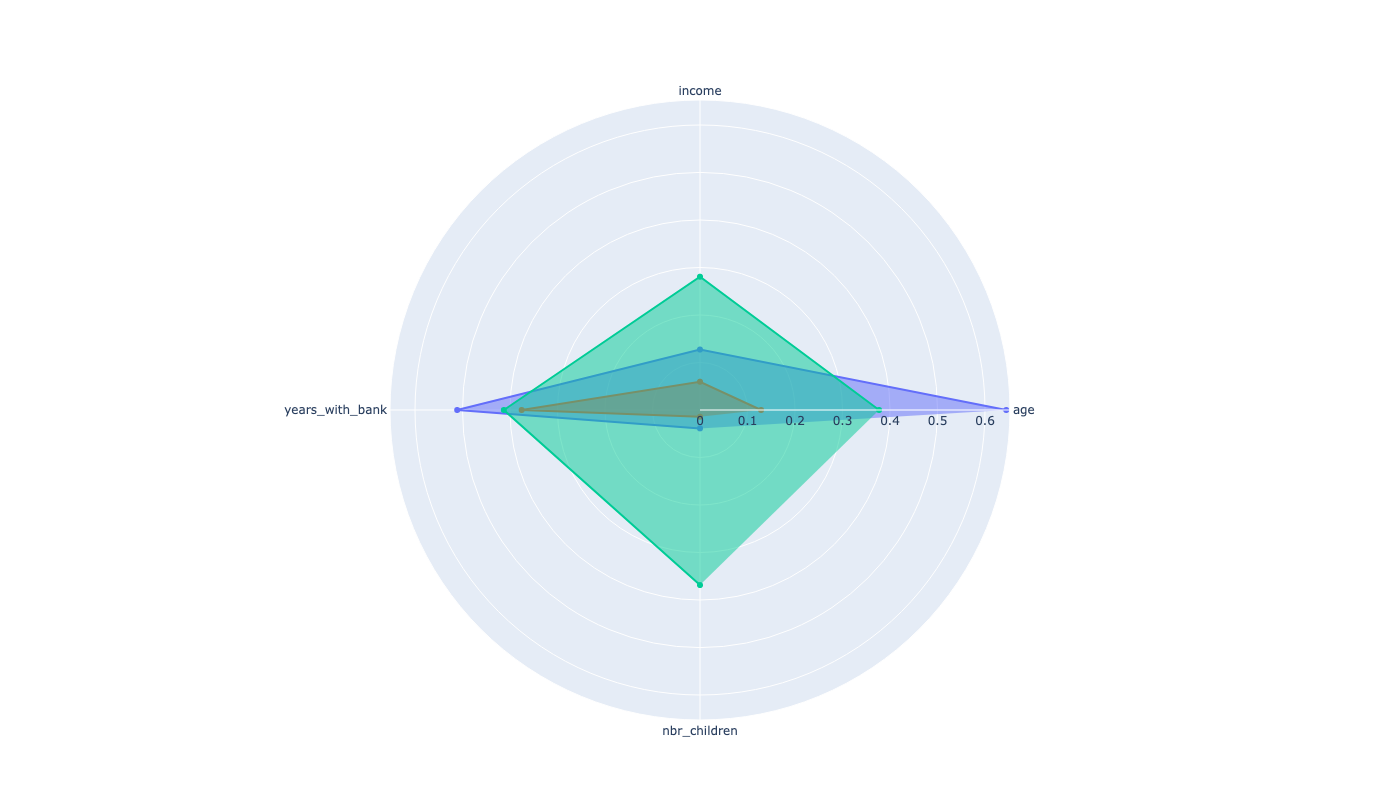

In [90]:
fig = go.Figure()

for cluster in range(radar_df.shape[0]):
    fig.add_trace(go.Scatterpolar(
        r=radar_df.iloc[cluster, :5],
        theta=categories,
        fill='toself',
        name=f'Cluster {cluster}'
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True,
                               range=[0, max(df_numeric_scaled_mm)])),
    showlegend=False,
    height = 800,
    width = 600

)

## Hierarchical clustering

## Ward method

In [224]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# create an object
ac_ward = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)




In [225]:
y_hc = ac_ward.fit_predict(X)

In [226]:
pd.Series(ac_ward.labels_).value_counts()

1    272
0    260
2    215
dtype: int64

In [227]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()


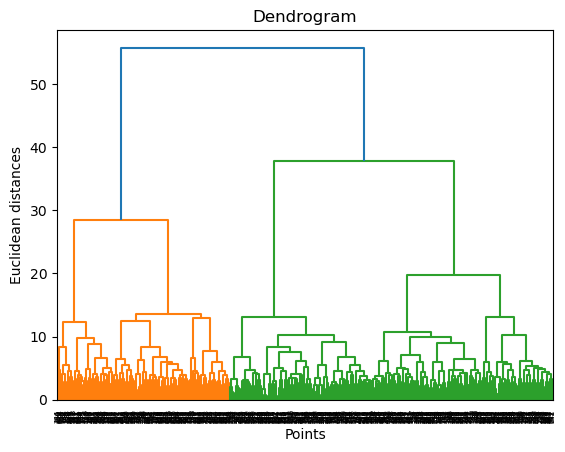

In [221]:
plot_dendrogram(X)

## Complete method

In [245]:

ac_complete = AgglomerativeClustering(linkage='complete',n_clusters = 3)
y_hc_complete = ac_complete.fit_predict(X)
pd.Series(ac_complete.labels_).value_counts()

0    536
2    188
1     23
dtype: int64

In [243]:
# define plot_dendrogram function
def plot_dendrogram_complete(X,method ='complete'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()


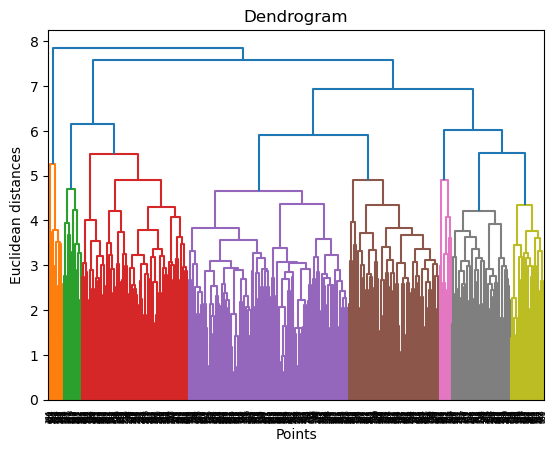

In [244]:
plot_dendrogram_complete(X)

In [246]:

ac_average = AgglomerativeClustering(linkage='average',n_clusters = 3)
y_hc_average = ac_average.fit_predict(X)
pd.Series(ac_average.labels_).value_counts()

1    488
2    175
0     84
dtype: int64

In [247]:
# define plot_dendrogram function
def plot_dendrogram_average(X,method ='average'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()


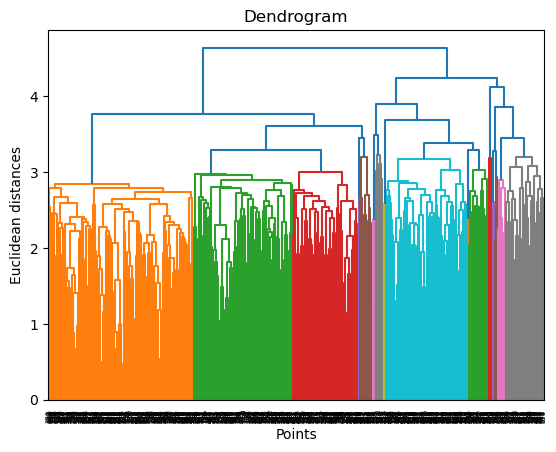

In [248]:
plot_dendrogram_average(X)

### We oberve that Ward method gives us the best result